In [1]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 머신러닝 패키지 import
import statsmodels.api as sm
import sklearn

# 한글 설정 /차트 마이너스 깨짐현상 해결
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False},style='darkgrid')

#### 합성곱신경망 이미지 분류

In [2]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [3]:
(train_input, train_target), (test_input, test_target) = load_data()

In [4]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled.shape

(60000, 28, 28, 1)

In [5]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [6]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)


합성곱 신경망 생성

In [7]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))  # 14x14 특성맵 = 32
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))  # 7X7 특성맵 = 64

In [8]:
model.add(keras.layers.Flatten())  # 7X7X64 = 3136
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))  # 60개 노드만 통과
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [9]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


모델 컴파일 훈련

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_cnn_model.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True, verbose=1)
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1498/1500 [============================>.] - ETA: 0s - loss: 0.5040 - accuracy: 0.8195
Epoch 1: val_loss improved from inf to 0.32879, saving model to ./data\best_cnn_model.h5
1500/1500 [==============================] - 26s 17ms/step - loss: 0.5041 - accuracy: 0.8194 - val_loss: 0.3288 - val_accuracy: 0.8810
Epoch 2/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.3402 - accuracy: 0.8793
Epoch 2: val_loss improved from 0.32879 to 0.28679, saving model to ./data\best_cnn_model.h5
1500/1500 [==============================] - 30s 20ms/step - loss: 0.3401 - accuracy: 0.8793 - val_loss: 0.2868 - val_accuracy: 0.8952
Epoch 3/20
1500/1500 [==============================] - ETA: 0s - loss: 0.2909 - accuracy: 0.8932
Epoch 3: val_loss improved from 0.28679 to 0.26342, saving model to ./data\best_cnn_model.h5
1500/1500 [==============================] - 30s 20ms/step - loss: 0.2909 - accuracy: 0.8932 - val_loss: 0.2634 - val_accuracy: 0.9031
Epoch 4/20
1500/1500 [====

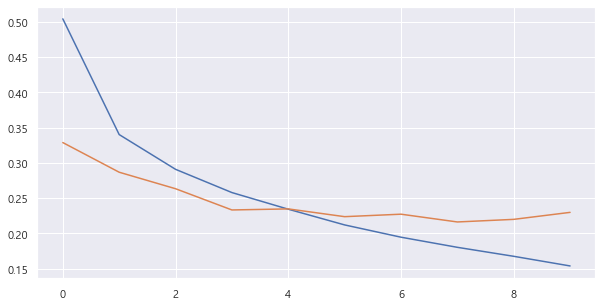

In [11]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [12]:
early_stopping_cb.stopped_epoch

9

In [13]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 6ms/step - loss: 0.2163 - accuracy: 0.9237


[0.21632830798625946, 0.9237499833106995]

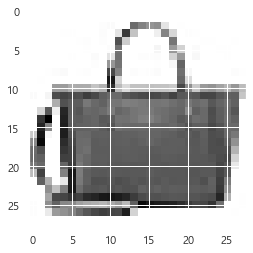

In [14]:
plt.imshow(X=val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [15]:
# 예측
result = model.predict(val_scaled[0:1])
result

1/1 [==============================] - 0s 87ms/step


array([[1.3472571e-19, 1.6960539e-24, 7.8968183e-22, 6.4080052e-22,
        3.0734251e-20, 1.1005776e-18, 1.4616809e-19, 8.4484381e-19,
        1.0000000e+00, 1.0116621e-19]], dtype=float32)

In [16]:
val_labels = np.argmax(model.predict(val_scaled[0:1]), axis=-1)
val_labels

1/1 [==============================] - 0s 18ms/step


array([8], dtype=int64)

In [17]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클부츠']

In [18]:
print(classes[np.argmax(result)])

가방
